In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as sc

In [2]:
datosm = pd.read_table("~/Documentos/VeranoAMC2020/NGC1003_rotmod.dat",header=2)
datosm.columns=["Rad (kpc)", "Vobs (km/s)", "errV (km/s)","Vgas (km/s)","Vdisk (km/s)","Vbul (km/s)","SBdisk (L/pc^2)","SBbul (L/pc^2)"]

De Newton $v = \sqrt{\frac{GM}{r}}$, entonces 

$M = \frac{v^2r}{G}$

In [3]:
M_sun = 1.98847e30 #Masa del sol en kg
kpc = 3.0857e19 # Valor de 1 kilopársec en m
G1 = (sc.G/kpc**3)*M_sun # Constante G en unidades de kpc^3/M_sun*s^2
G2 = (sc.G/(1e6*(kpc)))*M_sun # Constante G en unidades de kpc*km^2/M_o*s^2
print(G1)
print(G2)
#Masas
M_obs = datosm['Vobs (km/s)']**2*datosm['Rad (kpc)']/G2
M_gas = datosm['Vgas (km/s)']**2*datosm['Rad (kpc)']/G2
M_disk = datosm['Vdisk (km/s)']**2*datosm['Rad (kpc)']/G2

4.516992294966879e-39
4.300874309751434e-06


In [4]:
# Reemplzando columnas de velocidades por columnas de masas; en masas solares

datosm['Vobs (km/s)'] = M_obs
datosm['Vgas (km/s)'] = M_gas
datosm['Vdisk (km/s)'] = M_disk

#Renombramos
datosm.columns = ["Rad (kpc)", "Mobs (Mo)", "errV (km/s)","Mgas (Mo)","Mdisk (Mo)","Mbul (Mo)","SBdisk (L/pc^2)","SBbul (L/pc^2)"]

In [8]:
#Elimino tres columnas

datosm = datosm.drop(columns=['errV (km/s)','SBdisk (L/pc^2)','SBbul (L/pc^2)'])

TypeError: drop() got an unexpected keyword argument 'columns'

In [6]:
# Agrego una columna de masa total

datosm.insert(5,'Mtotal (Mo)',datosm['Mgas (Mo)']+datosm['Mdisk (Mo)'])

In [7]:
datosm

,Rad (kpc),Mobs (Mo),errV (km/s),Mgas (Mo),Mdisk (Mo),Mtotal (Mo),Mbul (Mo),SBdisk (L/pc^2),SBbul (L/pc^2)
0,1.25,6.420206e+08,7.6,1.221409e+06,9.436222e+08,9.448436e+08,0,175.71,0
1,2.08,1.712145e+09,4.5,1.781903e+07,2.020109e+09,2.037928e+09,0,107.61,0
2,2.90,3.456745e+09,3.7,7.879391e+07,3.783736e+09,3.862530e+09,0,67.61,0
3,3.73,5.222465e+09,3.1,1.884287e+08,5.237281e+09,5.425710e+09,0,47.27,0
4,4.56,7.374629e+09,3.6,3.064121e+08,6.712848e+09,7.019260e+09,0,29.91,0
5,5.39,1.008363e+10,3.8,4.648840e+08,7.898845e+09,8.363729e+09,0,14.66,0
6,6.22,1.272446e+10,2.4,6.759974e+08,7.787338e+09,8.463336e+09,0,7.84,0
7,7.04,1.604303e+10,3.0,9.109023e+08,7.911074e+09,8.821976e+09,0,5.24,0
8,7.87,1.941299e+10,2.5,1.336934e+09,7.958800e+09,9.295734e+09,0,3.23,0
9,8.70,2.022845e+10,2.3,1.643055e+09,7.977775e+09,9.620831e+09,0,2.03,0


In [9]:
datosv = pd.read_table("~/Documentos/VeranoAMC2020//NGC1003_rotmod.dat",header=2)
datosv.columns=["Rad (kpc)", "Vobs (km/s)", "errV (km/s)","Vgas (km/s)","Vdisk (km/s)","Vbul (km/s)","SBdisk (L/pc^2)","SBbul (L/pc^2)"]
datosv = datosv.drop(columns=['errV (km/s)','SBdisk (L/pc^2)','SBbul (L/pc^2)'])

TypeError: drop() got an unexpected keyword argument 'columns'

$$ v = \sqrt{\frac{G}{r}(M_{gas}+M_{disk})} $$

In [10]:
r = datosm['Rad (kpc)']
vT = np.sqrt(G1*(datosm['Mtotal (Mo)'])/r)
datosv.insert(5,'V_total',vT)

In [ ]:
datosv

,Rad (kpc),Vobs (km/s),Vgas (km/s),Vdisk (km/s),Vbul (km/s),V_total
0,1.25,47.0,2.05,56.98,0.0,1.847777e-15
1,2.08,59.5,6.07,64.63,0.0,2.103718e-15
2,2.90,71.6,10.81,74.91,0.0,2.452797e-15
3,3.73,77.6,14.74,77.71,0.0,2.563295e-15
4,4.56,83.4,17.00,79.57,0.0,2.636865e-15
5,5.39,89.7,19.26,79.39,0.0,2.647465e-15
6,6.22,93.8,21.62,73.38,0.0,2.479136e-15
7,7.04,99.0,23.59,69.52,0.0,2.379147e-15
8,7.87,103.0,27.03,65.95,0.0,2.309825e-15
9,8.70,100.0,28.50,62.80,0.0,2.234968e-15


Velocidad de referencia

$$v(r)=\left(a_{0} l_{\mathrm{M}} \frac{1-x^{4}}{1-x^{3}}\right)^{1 / 2}$$

con,

$$ x = \frac{l_M}{r} $$ \\


\begin{align}
l_M = \left( \frac{GM_T}{a_0} \right)^{1/2} & ; & M_T = M_{gas} + M_{disk}
\end{align}\\



$$ a_0 = 1.2 \times 10^{-10} m s^{-2} $$

In [11]:
from scipy.optimize import curve_fit

[87.11007849]


Text(0.5, 1.0, 'Ajuste')

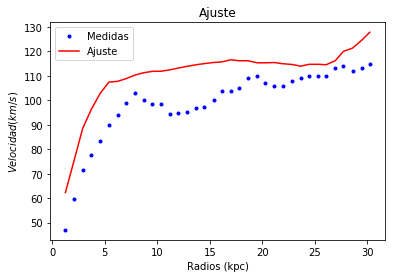

In [27]:
v = datosv['Vobs (km/s)']
n=3
def velocidad_a0(r,n):
  a00 = 1.2e-10 #en m/s^2
  a0 = a00*(1/(kpc)) #en kpc/s^2
  lm = np.sqrt(G1*datosm['Mtotal (Mo)']/a0)
  x = lm/r
  return np.sqrt(a00*lm*3.0857e13*(1-x**(n+1))/(1-x**n))

popt, pcov = curve_fit(velocidad_a0, r,v)
print(popt)

teorico = velocidad_a0(r,*popt)

plt.plot(r,v,'b.',r,teorico,'r-')

plt.legend(('Medidas', 'Ajuste'))
plt.xlabel("Radios (kpc)")
plt.ylabel("$Velocidad (km/s)$")
plt.title("Ajuste")

[7.32873913e-11]


Text(0.5, 1.0, 'Ajuste')

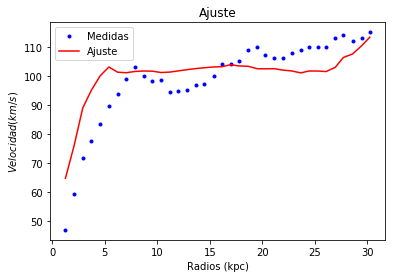

In [22]:
del v

v = datosv['Vobs (km/s)']

def velocidad_a0(r,a0):
  lm = np.sqrt(G1*datosm['Mtotal (Mo)']/(a0*(1/(kpc))))
  x = lm/r
  return np.sqrt(a0*lm*3.0857e13*(1-x**(4))/(1-x**3))

popt, pcov = curve_fit(velocidad_a0, r,v)
print(popt)

teorico = velocidad_a0(r,*popt)

plt.plot(r,v,'b.',r,teorico,'r-')

plt.legend(('Medidas', 'Ajuste'))
plt.xlabel("Radios (kpc)")
plt.ylabel("$Velocidad (km/s)$")
plt.title("Ajuste")

[7.81958248e-11 2.34621020e+03]


Text(0.5, 1.0, 'Ajuste')

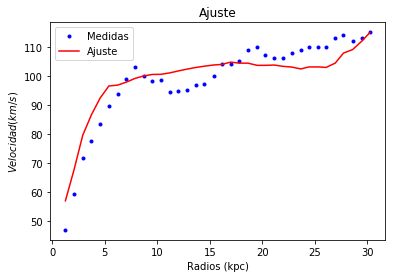

In [23]:
del v

v = datosv['Vobs (km/s)']

def velocidad_a0n(r,a0,n):
  lm = np.sqrt(G1*datosm['Mtotal (Mo)']/(a0*(1/(kpc))))
  x = lm/r
  return np.sqrt(a0*lm*3.0857e13*(1-x**(n+1))/(1-x**n))

popt, pcov = curve_fit(velocidad_a0n, r,v)
print(popt)

teorico2 = velocidad_a0n(r,*popt)

plt.plot(r,v,'b.',r,teorico2,'r-')

plt.legend(('Medidas', 'Ajuste'))
plt.xlabel("Radios (kpc)")
plt.ylabel("$Velocidad (km/s)$")
plt.title("Ajuste")